In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/train.csv')

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


we should drop 'id' because is continuous values

In [6]:
df.shape

(1460, 81)

##### we have 80 features and 1 target varible 

# Handling Missing Data

In [7]:
def get_feature_types_stats(df):
    """function take dataFrame and create small datFrame containing two columns 
        feature name and feature type 

    Args:
        df ([DataFrame]): [DataFrame we want to extract feature name and type]

    Returns:
        [DataFrame]: [dataFrame containing feature name and type from original data]
    """
    features = df.dtypes.rename('feature_type').reset_index().rename(columns={'index':'feature_name'})
    return features


def get_feature_stats(df):
    """function take dataFrame and compute the number of missing value in eache feature
        and compute the percentage of missing, then merge this dataFrame with dataFrame 
        how came from get_feature_types_stats() function

    Args:
        df ([DataFrame]): [DataFrame we want to compute the missing values]

    Returns:
        [DataFrame]: [dataFrame containing four columns [feature_name,  missing_count, missing_percentage, feature_type]]
    """
    missing_stats = df.isna().sum().rename('missing_count').reset_index().rename(columns={'index':'feature_name'})
    missing_stats['missing_percentage'] = missing_stats['missing_count']/df.shape[0]
    
    feature_types_df = get_feature_types_stats(df)
    
    missing_stats = missing_stats.merge(feature_types_df, how='left', 
                                        left_on='feature_name', 
                                        right_on='feature_name',)
    return missing_stats
 

In [8]:
df_stats = get_feature_stats(df)

In [9]:
df_stats.sort_values('missing_percentage')

,feature_name,missing_count,missing_percentage,feature_type
0,Id,0,0.000000,int64
38,TotalBsmtSF,0,0.000000,int64
39,Heating,0,0.000000,object
79,SaleCondition,0,0.000000,object
41,CentralAir,0,0.000000,object
...,...,...,...,...
57,FireplaceQu,690,0.472603,object
73,Fence,1179,0.807534,object
6,Alley,1369,0.937671,object
74,MiscFeature,1406,0.963014,object


<AxesSubplot:xlabel='missing_percentage', ylabel='Count'>

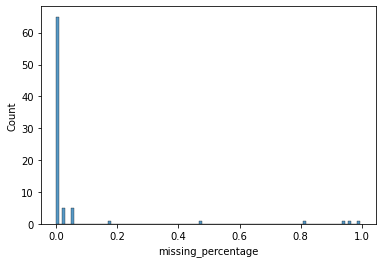

In [10]:
sns.histplot(df_stats['missing_percentage'], bins=100)

### delete all features with more than 10% 

In [11]:
features_to_delete = df_stats[df_stats['missing_percentage'] > 0.1]['feature_name'].values
features_to_delete

array(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [12]:
df.drop(columns=features_to_delete, inplace=True)

In [13]:
df.shape

(1460, 75)

### let's look for features that have missing_count more than zero

In [14]:
missing_stats = get_feature_stats(df)
missing_stats

,feature_name,missing_count,missing_percentage,feature_type
0,Id,0,0.0,int64
1,MSSubClass,0,0.0,int64
2,MSZoning,0,0.0,object
3,LotArea,0,0.0,int64
4,Street,0,0.0,object
...,...,...,...,...
70,MoSold,0,0.0,int64
71,YrSold,0,0.0,int64
72,SaleType,0,0.0,object
73,SaleCondition,0,0.0,object


In [15]:
missing_stats = missing_stats[missing_stats['missing_count'] != 0]
missing_stats

,feature_name,missing_count,missing_percentage,feature_type
23,MasVnrType,8,0.005479,object
24,MasVnrArea,8,0.005479,float64
28,BsmtQual,37,0.025342,object
29,BsmtCond,37,0.025342,object
30,BsmtExposure,38,0.026027,object
31,BsmtFinType1,37,0.025342,object
33,BsmtFinType2,38,0.026027,object
40,Electrical,1,0.000685,object
55,GarageType,81,0.055479,object
56,GarageYrBlt,81,0.055479,float64


In [16]:
# delete the samples containing the missing values
for feature in missing_stats['feature_name'].values:
    df = df[df[feature].notna() ]

In [17]:
df.shape

(1338, 75)

In [18]:
# re compute for new df and see of ther any feature has missing data
df_stats = get_feature_stats(df)
df_stats[df_stats['missing_count'] > 0]

,feature_name,missing_count,missing_percentage,feature_type


# EDA and Feature Engineering

In [19]:
# drop id column
df.drop('Id', inplace=True, axis=1)

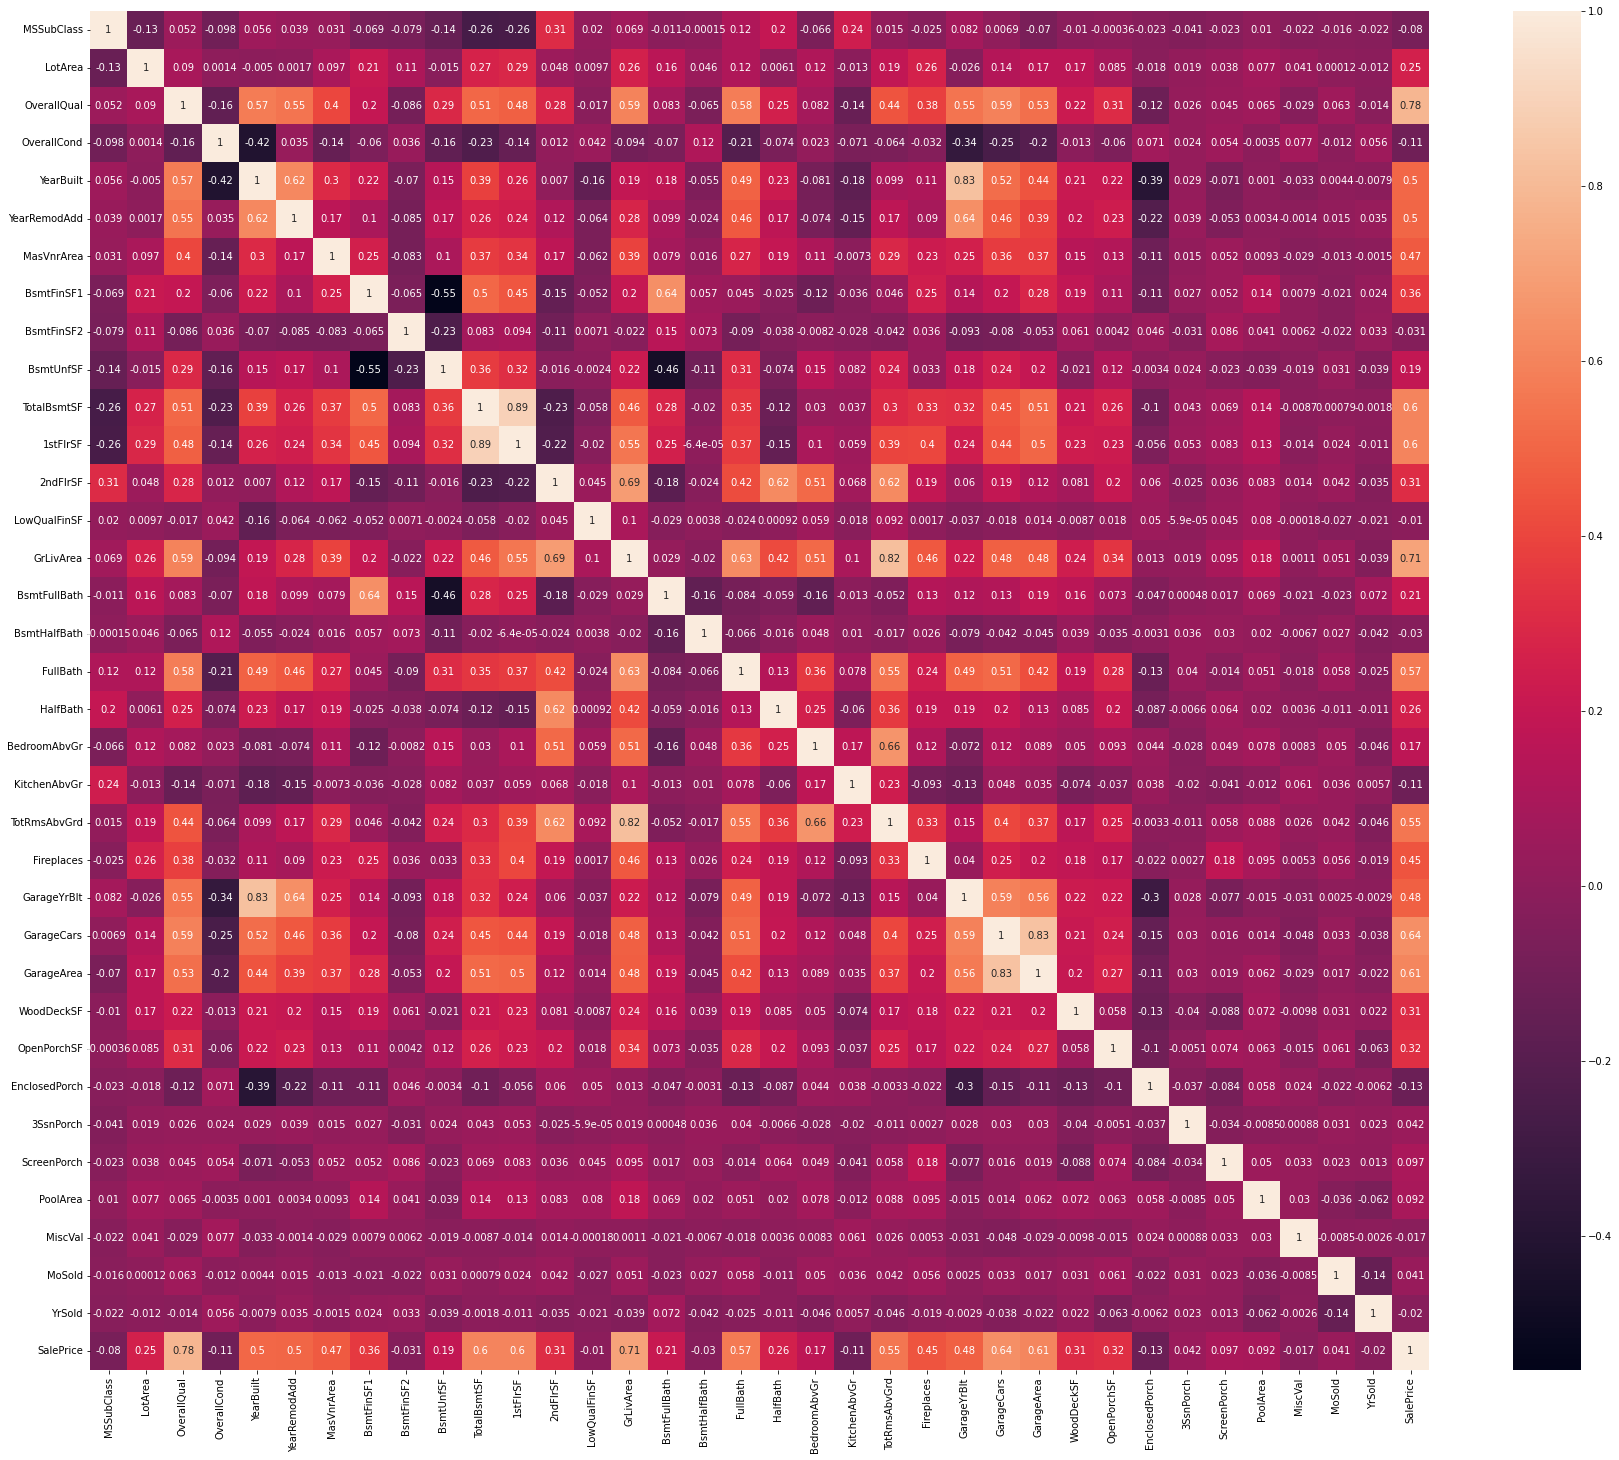

In [18]:
f, ax1 = plt.subplots(figsize=(30,25)) 
ax1 = sns.heatmap(df.corr(), annot=True)

- Lots of strong correlations on show, especially Overall Quality [OverallQual] <br>
- the Features regarding the Garage are also relating strongly
- SalePrice It has a lot strong correlations feature

In [20]:
corr = df.corr()

corr[corr['SalePrice'] > 0.6 ]['SalePrice']

OverallQual    0.783546
TotalBsmtSF    0.602042
1stFlrSF       0.604714
GrLivArea      0.711706
GarageCars     0.640154
GarageArea     0.607535
SalePrice      1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

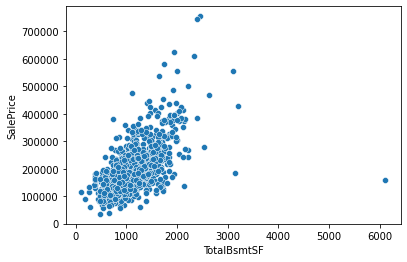

In [21]:
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')

seem we have point very outliers

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

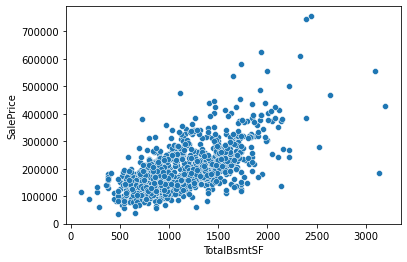

In [22]:
df = df[df['TotalBsmtSF'] < 6000]
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

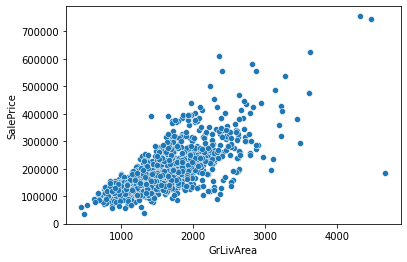

In [23]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

seems that 'SalePrice' and 'GrLivArea' ,  has a linear relationship

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

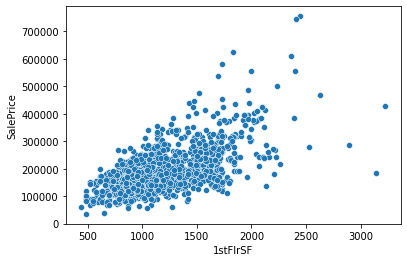

In [24]:
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

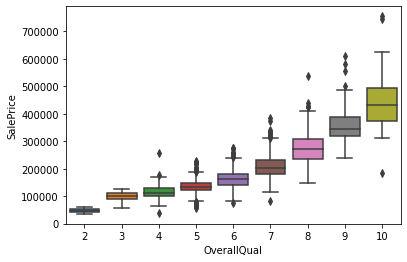

In [25]:
sns.boxplot(data=df, x='OverallQual', y='SalePrice')

seems all good

---

# Data Processing

## Target Variable
- learn more about the Target Variable [Sale Price]
- deviation problems Lead to the problems modeling phase

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

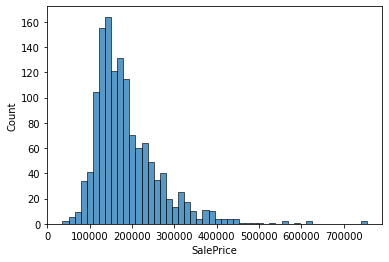

In [26]:
sns.histplot(df['SalePrice'], bins=50)

- We can see here the Target Variable is right-skewed. 
- A log transformation should help bring it back to normality.

In [27]:
# Applying a log(1+x) transformation to SalePrice
df["SalePrice"] = np.log1p(df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

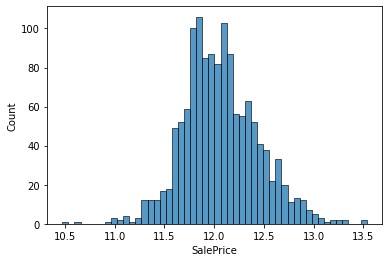

In [28]:
sns.histplot(df['SalePrice'], bins=50)

the target variable now looks far more amenable for modeling

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

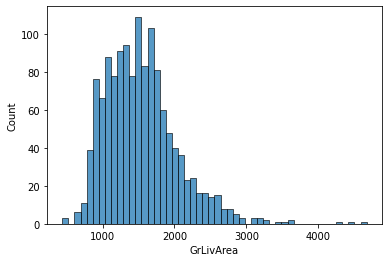

In [29]:
sns.histplot(df['GrLivArea'], bins=50)

In [30]:
df["GrLivArea"] = np.log1p(df["GrLivArea"])

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

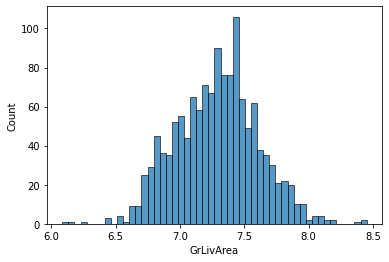

In [31]:
sns.histplot(df['GrLivArea'], bins=50)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

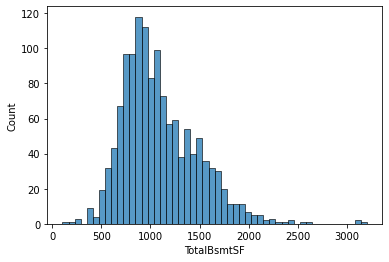

In [32]:
sns.histplot(df['TotalBsmtSF'], bins=50)

In [33]:
df["TotalBsmtSF"] = np.log1p(df["TotalBsmtSF"])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

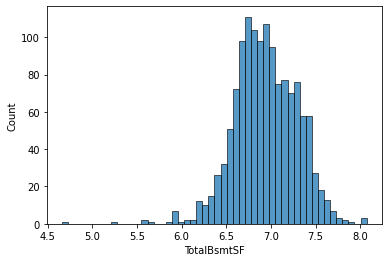

In [34]:
sns.histplot(df['TotalBsmtSF'], bins=50)

### Create One Hot Encoder


In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
enc = OneHotEncoder(drop='first', sparse=False)

In [37]:
enc.fit(df.drop(['SalePrice'], axis=1))

OneHotEncoder(drop='first', sparse=False)

--- 

# ML Algorithms

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from pprint import pprint

### Split the data

In [39]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=30)

In [40]:
train, valid = train_test_split(df_train, test_size=0.20, random_state=30)

In [41]:
train.shape, df_test.shape, valid.shape

((855, 74), (268, 74), (214, 74))

In [42]:
X_train = train.drop(['SalePrice'], axis=1) 
y_train = train['SalePrice']

In [43]:
X_valid = valid.drop(['SalePrice'], axis=1) 
y_valid = valid['SalePrice']

In [44]:
X_test = df_test.drop(['SalePrice'], axis=1) 
y_test = df_test['SalePrice']

In [45]:
X_train = enc.transform(X_train)
X_valid = enc.transform(X_valid)
X_test = enc.transform(X_test)

In [46]:
X_train.shape, X_valid.shape, X_test.shape

((855, 7143), (214, 7143), (268, 7143))

In [47]:
# to save best models
best_algorithm = {}

In [48]:
def show_save_grid_search(neam_algo, grid_search_model, X_test, y_test):
    """function take grid search model and print the best estimator,
        best parameters, best score, mean absolute error and Root Mean Squared Error
        then seav this result into best_algorithm dictionary

    Args:
        neam_algo (string): name of ML algorithm
        grid_search_model (GridSearchCV): [grid search model for ML algorithm]
        X_test (ndarray): [test data for predict]
        y_test (ndarray): [test target variable for calculate error]
    """
    
    # best model with best parameters
    print('best estimator:', grid_search_model.best_estimator_)
    # best parameters
    print("best parameters :")
    pprint(grid_search_model.best_params_)
    # best score
    print("\nbest score", grid_search_model.best_score_)
    
    y_predicted = grid_search_model.predict(X_test)
    MAE = mean_absolute_error(y_test, y_predicted)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predicted))
    
    print("\nMean Absolute Error", MAE)
    print("Root Mean Squared Error", RMSE)
    
    best_algorithm[neam_algo] = {
        
        'best_estimator': grid_search_model.best_estimator_,
        'best_score': grid_search_model.best_score_,
        'mean_absolute_error':  MAE,
        'root_mean_squared_error': RMSE
    }
    

### RandomForestRegressor

In [49]:
parameters_random_forest = {
    'n_estimators': [100, 200, 300, 1000], # 4
    'max_features': [2, 3, 5], # 3
    'max_depth': [80, 90, 100, 110], # 4
    'min_samples_split': [8, 10, 12], # 3
    'min_samples_leaf': [3, 4, 5, 7], # 4
}

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

will try out 4 * 3 * 4 * 3 * 4 = 576 combinations of settings

In [ ]:
grid_search_model = GridSearchCV(RandomForestRegressor(random_state=30), parameters_random_forest, cv=5)

grid_search_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=30),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3, 5],
                         'min_samples_leaf': [3, 4, 5, 7],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [ ]:
show_save_grid_search('RandomForestRegressor', grid_search_model, X_valid, y_valid)

best estimator: RandomForestRegressor(max_depth=80, max_features=5, min_samples_leaf=3,
                      min_samples_split=10, random_state=30)
best parameters :
{'max_depth': 80,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

best score 0.038031166907817916

Mean Absolute Error 0.3071440465559233
Root Mean Squared Error 0.3895174575130722


### GradientBoostingRegressor

In [ ]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters_GradientBoosting = {
    'n_estimators': [200, 300, 500], # 3
    'max_features': [2, 3, 5], # 3
    'max_depth': [3, 4, 5], # 3
    'learning_rate': [0.01, 0.1, 1], # 3
    'min_samples_split': [8, 12], # 2
    'min_samples_leaf': [3, 5], # 2
}

will try out 3 * 3 * 3 * 3 * 2 * 2 = 324 combinations of settings

In [ ]:
grid_search_model_GradientBoosting = GridSearchCV(GradientBoostingRegressor(random_state=30), parameters_GradientBoosting, cv=5)

grid_search_model_GradientBoosting.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=30),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 4, 5], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [8, 12],
                         'n_estimators': [200, 300, 500]})

In [ ]:
show_save_grid_search('GradientBoostingRegressor', grid_search_model_GradientBoosting, X_valid, y_valid)

best estimator: GradientBoostingRegressor(learning_rate=1, max_features=5, min_samples_leaf=5,
                          min_samples_split=12, n_estimators=500,
                          random_state=30)
best parameters :
{'learning_rate': 1,
 'max_depth': 3,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 500}

best score 0.5514039475856386

Mean Absolute Error 0.20993086860523444
Root Mean Squared Error 0.2732562249392414


### KNeighborsRegressor

In [ ]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
parameters_knn = {
    'n_neighbors': [3, 5, 7, 10], # 4
    'weights': ['uniform', 'distance'], # 2
}

- weights : 'uniform' = neighbor within the boundary carries the same weight or ‘distance’ where closer points will be more heavily weighted toward the decision
            'distance' = the class with the highest number in the boundary may not “win the vote”
            
- n_neighbors: which has been metioned earlier

In [ ]:
grid_search_model_knn = GridSearchCV(KNeighborsRegressor(), parameters_knn, cv=5)

grid_search_model_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

In [ ]:
show_save_grid_search('KNeighborsRegressor', grid_search_model_knn, X_valid, y_valid)

best estimator: KNeighborsRegressor(n_neighbors=3, weights='distance')
best parameters :
{'n_neighbors': 3, 'weights': 'distance'}

best score 0.7086317974091049

Mean Absolute Error 0.15084001726551047
Root Mean Squared Error 0.21768931297421817


### polynomial regression with regularization

In [ ]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
parameters_Ridge = {
    'alpha':[0.1, 1, 3, 7],
    'fit_intercept' : [True , False]
}

In [ ]:
models = []

for degree in [1, 2]:
    
    X_train_poly = PolynomialFeatures(degree=degree).fit_transform(X_train)
    
    modle = GridSearchCV(Ridge(random_state=30), parameters_Ridge, cv=5)
    
    modle.fit(X_train_poly, y_train)
    
    models.append({
        'best_estimator': modle.best_estimator_,
        'best_score': modle.best_score_,
        'degree':degree
    })

C:\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:193: LinAlgWarning: Ill-conditioned matrix (rcond=2.62069e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
C:\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:193: LinAlgWarning: 

KeyboardInterrupt: 

In [ ]:
models

[{'best_estimator': Ridge(alpha=3, random_state=30),
  'best_score': -28.015765719092837,
  'degree': 2}]

## Nested cross validation

In [50]:
best_algorithm_random = {}

parameters_random_forest = {
    'n_estimators': [100, 200, 300, 1000], # 4
    'max_features': [2, 3, 5], # 3
    'max_depth': [80, 90, 100, 110], # 4
    'min_samples_split': [8, 10, 12], # 3
    'min_samples_leaf': [3, 4, 5, 7], # 4
}

parameters_GradientBoosting = {
    'n_estimators': [200, 300, 500], # 3
    'max_features': [2, 3, 5], # 3
    'max_depth': [3, 4, 5], # 3
    'learning_rate': [0.01, 0.1, 1], # 3
    'min_samples_split': [8, 12], # 2
    'min_samples_leaf': [3, 5], # 2
}

parameters_knn = {
    'n_neighbors': [3, 5, 7, 10], # 4
    'weights': ['uniform', 'distance'], # 2
}

In [51]:
parameters= [parameters_random_forest, parameters_GradientBoosting, parameters_knn]
ml_algorithms = [RandomForestRegressor(), GradientBoostingRegressor(), KNeighborsRegressor()]
name_ml_algorithms = ['RandomForestRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor']


In [52]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [54]:
X_train.shape, y_train.shape

((1002, 73), (1002,))

In [55]:
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

In [57]:
cv_outer = KFold(n_splits=5, shuffle=False)
cv_inner = KFold(n_splits=5, shuffle=False)


In [58]:
for index_modle in range(len(ml_algorithms)):
    
   model = RandomizedSearchCV(estimator=ml_algorithms[index_modle],
                              param_distributions= parameters[index_modle],
                              n_iter=5,
                              cv=cv_inner)
   model.fit(X=X_train, y=y_train)
   
   search = cross_val_score(model, X=X_train, y=y_train, cv=cv_outer)
   
   best_algorithm_random[name_ml_algorithms[index_modle]] = {
      
      'nested_scores': search.mean(),
      'best_score': model.best_score_,
      'best_estimator': model.best_estimator_,
      'randomized_model': model
   }

# Choose the best model and save it

## GridSearchCV with validation

In [59]:
for algo_name in best_algorithm:
    print("aglorithm name :", algo_name)
    for stat in best_algorithm[algo_name]: 
        print(stat,': ', end='')
        pprint(best_algorithm[algo_name][stat])
    print("______________________________")

#### From this statistic we choice a machine learning algorithm that has minimum residuals <br> It is clear that the KNeighborsRegressor is the best model

## RandomizedSearchCV with cross-validation

In [60]:
for algo_name in best_algorithm_random:
    print("aglorithm name :", algo_name)
    for stat in best_algorithm_random[algo_name]: 
        print(stat,': ', end='')
        pprint(best_algorithm_random[algo_name][stat])
    print("______________________________")

aglorithm name : RandomForestRegressor
nested_scores : 0.010197500271857262
best_score : 0.01967916068064981
best_estimator : RandomForestRegressor(max_depth=90, max_features=5, min_samples_leaf=4,
                      min_samples_split=12, n_estimators=200)
randomized_model : RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3, 5],
                                        'min_samples_leaf': [3, 4, 5, 7],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]})
______________________________
aglorithm name : GradientBoostingRegressor
nested_scores : 0.5141296187632781
best_score : 0.4912034733987623
best_estimator : GradientBoostingRegressor(learning_rate=1, max_depth=5, 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['SalePrice'],axis=1), df['SalePrice'] , test_size=0.20, random_state=30)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 73), (268, 73), (1069,), (268,))

## traning the knn model 

In [63]:
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

In [64]:
knn_model = KNeighborsRegressor(n_neighbors=7, weights='distance')

knn_model.fit(X=X_train, y=y_train)

KNeighborsRegressor(n_neighbors=7, weights='distance')

In [65]:
y_predict = knn_model.predict(X_test)

In [68]:
knn_model.score(X_test, y_test)

0.7656380158017391

In [67]:
mean_squared_error(y_test, y_predict)

0.02908718782670941

## choise anther model


In [ ]:
model = best_algorithm['GradientBoostingRegressor']['best estimator']

In [ ]:
model = GradientBoostingRegressor(max_depth=4, max_features=5, min_samples_leaf=5,
                          min_samples_split=8, n_estimators=500,
                          random_state=30)

model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, max_features=5, min_samples_leaf=5,
                          min_samples_split=8, n_estimators=500,
                          random_state=30)

In [ ]:
model.score(X_train, y_train)

0.5622572603823421

In [ ]:
y_predict_Gradient = model.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict_Gradient)

0.052821855893756466

In [ ]:
import pickle


In [ ]:
pickle.dump(model, open('./flask-app/app/models/model.sav', 'wb'))
pickle.dump(enc, open('./flask-app/app/models/enc.sav', 'wb'))

---